In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
movies_df = pd.read_csv("/content/drive/Othercomputers/My Laptop/Desktop/SCALER-20240901T061051Z-001/SCALER/MODULE 13 Time Series & Recommendation/Business case study/FINAL/Zee recommender/zee-movies.dat", encoding='latin-1', sep='::', header=None, names=['Movie ID', 'Title', 'Genres'], engine='python')
display(movies_df.head())

,Movie ID,Title,Genres
0,Movie ID,Title,Genres
1,1,Toy Story (1995),Animation|Children's|Comedy
2,2,Jumanji (1995),Adventure|Children's|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama


In [ ]:
ratings_df = pd.read_csv("/content/drive/Othercomputers/My Laptop/Desktop/SCALER-20240901T061051Z-001/SCALER/MODULE 13 Time Series & Recommendation/Business case study/FINAL/Zee recommender/zee-ratings.dat", encoding='latin-1', sep='::', header=None, engine='python')
display(ratings_df.head())

,0,1,2,3
0,UserID,MovieID,Rating,Timestamp
1,1,1193,5,978300760
2,1,661,3,978302109
3,1,914,3,978301968
4,1,3408,4,978300275


In [ ]:
user_df= pd.read_csv("/content/drive/Othercomputers/My Laptop/Desktop/SCALER-20240901T061051Z-001/SCALER/MODULE 13 Time Series & Recommendation/Business case study/FINAL/Zee recommender/zee-users.dat", encoding='latin-1', sep='::', header=None, names=['UserID', 'Gender', 'Age','Occupation','Zip-code'], engine='python')
user_df

,UserID,Gender,Age,Occupation,Zip-code
0,UserID,Gender,Age,Occupation,Zip-code
1,1,F,1,10,48067
2,2,M,56,16,70072
3,3,M,25,15,55117
4,4,M,45,7,02460
...,...,...,...,...,...
6036,6036,F,25,15,32603
6037,6037,F,45,1,76006
6038,6038,F,56,1,14706
6039,6039,F,45,0,01060


## Problem Statement

Creating a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

In [ ]:
movies_df = movies_df.drop(0,axis = 0)
user_df  = user_df.drop(0,axis =0)
ratings_df = ratings_df.drop(0,axis =0 )

In [ ]:
ratings_df = ratings_df.rename(columns = {0:'UserID',1:'MovieID',2:'Rating',3:'Timestamp'})

In [ ]:
user_df

,UserID,Gender,Age,Occupation,Zip-code
1,1,F,1,10,48067
2,2,M,56,16,70072
3,3,M,25,15,55117
4,4,M,45,7,02460
5,5,M,25,20,55455
...,...,...,...,...,...
6036,6036,F,25,15,32603
6037,6037,F,45,1,76006
6038,6038,F,56,1,14706
6039,6039,F,45,0,01060


In [ ]:
ratings_df

,UserID,MovieID,Rating,Timestamp
1,1,1193,5,978300760
2,1,661,3,978302109
3,1,914,3,978301968
4,1,3408,4,978300275
5,1,2355,5,978824291
...,...,...,...,...
1000205,6040,1091,1,956716541
1000206,6040,1094,5,956704887
1000207,6040,562,5,956704746
1000208,6040,1096,4,956715648


In [ ]:
movies_df

,Movie ID,Title,Genres
1,1,Toy Story (1995),Animation|Children's|Comedy
2,2,Jumanji (1995),Adventure|Children's|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama
5,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3879,3948,Meet the Parents (2000),Comedy
3880,3949,Requiem for a Dream (2000),Drama
3881,3950,Tigerland (2000),Drama
3882,3951,Two Family House (2000),Drama


## Examine dataset structure, characteristics, and statistical summary

In [ ]:
ratings_df.info(),movies_df.info(),user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 1 to 1000209
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  object
 1   MovieID    1000209 non-null  object
 2   Rating     1000209 non-null  object
 3   Timestamp  1000209 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 1 to 3883
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  3883 non-null   object
 1   Title     3883 non-null   object
 2   Genres    3883 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 1 to 6040
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   object
 1   Gender      6040 non-null   objec

(None, None, None)

UserID::Gender::Age::Occupation::Zip-code


Gender is denoted by a "M" for male and "F" for female

Age is chosen from the following ranges:

1: "Under 18"

18: "18-24"

25: "25-34"

35: "35-44"

45: "45-49"

50: "50-55"

56: "56+"

Occupation is chosen from the following choices:

0: "other" or not specified

1: "academic/educator"

2: "artist"

3: "clerical/admin"

4: "college/grad student"

5: "customer service"

6: "doctor/health care"

7: "executive/managerial"

8: "farmer"

9: "homemaker"

10: "K-12 student"

11: "lawyer"

12: "programmer"

13: "retired"

14: "sales/marketing"

15: "scientist"

16: "self-employed"

17: "technician/engineer"

18: "tradesman/craftsman"

19: "unemployed"

20: "writer"

MOVIES FILE DESCRIPTION

=========================================================================

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

Titles are identical to titles provided by the IMDB (including year of release)

Genres are pipe-separated and are selected from the following genres:

Action

Adventure

Animation

Children's

Comedy

Crime

Documentary

Drama

Fantasy

Film-Noir

Horror

Musical

Mystery

Romance

Sci-Fi

Thriller

War

Western


Concepts Tested:

Recommender Engine

Collaborative Filtering (Item-based & User-based Approach)

Pearson Correlation

Nearest Neighbors using Cosine Similarity

Matrix Factorization

In [ ]:
ratings_df.describe(include ='object')

,UserID,MovieID,Rating,Timestamp
count,1000209,1000209,1000209,1000209
unique,6040,3706,5,458455
top,4169,2858,4,975528402
freq,2314,3428,348971,30


In [ ]:
movies_df.describe(include ='object')

,Movie ID,Title,Genres
count,3883,3883,3883
unique,3883,3883,301
top,3952,"Contender, The (2000)",Drama
freq,1,1,843


In [ ]:
user_df.describe(include ='object')

,UserID,Gender,Age,Occupation,Zip-code
count,6040,6040,6040,6040,6040
unique,6040,2,7,21,3439
top,6040,M,25,4,48104
freq,1,4331,2096,759,19


In [ ]:
movies_df['Genres']

,Genres
1,Animation|Children's|Comedy
2,Adventure|Children's|Fantasy
3,Comedy|Romance
4,Comedy|Drama
5,Comedy
...,...
3879,Comedy
3880,Drama
3881,Drama
3882,Drama


## Data Preprocessing

Feature engineering,Data cleaning, Data Preprocessing, Data merging, Data imputation everthing is done under this hood

In [ ]:
r_df = ratings_df.copy()

In [ ]:
from datetime import datetime

In [ ]:
datetime.fromtimestamp(1633072800)

datetime.datetime(2021, 10, 1, 7, 20)

In [ ]:
r_df['Hour'] = r_df['Timestamp'].apply(lambda x: datetime.fromtimestamp(int(x)).hour)

In [ ]:
r_df['Timestamp'] = r_df['Timestamp'].apply(lambda x: datetime.fromtimestamp(int(x)))

In [ ]:
r_df['Rating_Year'] = r_df['Timestamp'].dt.year
r_df['Rating_Month'] = r_df['Timestamp'].dt.month
r_df['Rating_on_Weekend'] = (r_df['Timestamp'].dt.weekday >= 5).astype(int)

In [ ]:
r_df.rename(columns={'Hour': 'Rating_hour'}, inplace=True)

In [ ]:
r_df

,UserID,MovieID,Rating,Timestamp,Rating_hour,Rating_Year,Rating_Month,Rating_on_Weekend
1,1,1193,5,2000-12-31 22:12:40,22,2000,12,1
2,1,661,3,2000-12-31 22:35:09,22,2000,12,1
3,1,914,3,2000-12-31 22:32:48,22,2000,12,1
4,1,3408,4,2000-12-31 22:04:35,22,2000,12,1
5,1,2355,5,2001-01-06 23:38:11,23,2001,1,1
...,...,...,...,...,...,...,...,...
1000205,6040,1091,1,2000-04-26 02:35:41,2,2000,4,0
1000206,6040,1094,5,2000-04-25 23:21:27,23,2000,4,0
1000207,6040,562,5,2000-04-25 23:19:06,23,2000,4,0
1000208,6040,1096,4,2000-04-26 02:20:48,2,2000,4,0


In [ ]:
r_df.drop(columns ='Timestamp', inplace = True)

In [ ]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 1 to 1000209
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   UserID             1000209 non-null  object
 1   MovieID            1000209 non-null  object
 2   Rating             1000209 non-null  object
 3   Rating_hour        1000209 non-null  int64 
 4   Rating_Year        1000209 non-null  int32 
 5   Rating_Month       1000209 non-null  int32 
 6   Rating_on_Weekend  1000209 non-null  int64 
dtypes: int32(2), int64(2), object(3)
memory usage: 45.8+ MB


In [ ]:
r_df['Rating'] = pd.to_numeric(r_df['Rating'])

In [ ]:

r_df_gr = r_df.groupby('UserID')['Rating'].mean().round(2)

In [ ]:
r_df_gr

,Rating
UserID,
1,4.19
10,4.11
100,3.03
1000,4.13
1001,3.65
...,...
995,3.90
996,3.94
997,3.93


In [ ]:
r_df_gr.rename('Avg_user_rating',inplace = True)

,Avg_user_rating
UserID,
1,4.19
10,4.11
100,3.03
1000,4.13
1001,3.65
...,...
995,3.90
996,3.94
997,3.93


In [ ]:
r_df

,UserID,MovieID,Rating,Rating_hour,Rating_Year,Rating_Month,Rating_on_Weekend
1,1,1193,5,22,2000,12,1
2,1,661,3,22,2000,12,1
3,1,914,3,22,2000,12,1
4,1,3408,4,22,2000,12,1
5,1,2355,5,23,2001,1,1
...,...,...,...,...,...,...,...
1000205,6040,1091,1,2,2000,4,0
1000206,6040,1094,5,23,2000,4,0
1000207,6040,562,5,23,2000,4,0
1000208,6040,1096,4,2,2000,4,0


In [ ]:
r_df_gr2 = r_df.groupby('UserID')['Rating'].count()

In [ ]:
r_df_gr2.rename('Total_user_ratingCount',inplace = True)

,Total_user_ratingCount
UserID,
1,53
10,401
100,76
1000,84
1001,377
...,...
995,49
996,296
997,30


In [ ]:
r_df_gr3 = r_df.groupby('MovieID')['Rating'].mean()

In [ ]:
r_df_gr3.rename('Avg_movie_rating',inplace = True)

,Avg_movie_rating
MovieID,
1,4.146846
10,3.540541
100,3.062500
1000,3.050000
1002,4.250000
...,...
994,4.095556
996,2.906250
997,3.357143


In [ ]:
r_df_gr4 = r_df.groupby('MovieID')['Rating'].count()

In [ ]:
r_df_gr4

,Rating
MovieID,
1,2077
10,888
100,128
1000,20
1002,8
...,...
994,450
996,256
997,28


In [ ]:
m_df = movies_df.copy()

In [ ]:
m_df['Genres'] = m_df['Genres'].str.split('|')

In [ ]:
m_df = m_df.explode('Genres')

In [ ]:
m_df['Genres'] = m_df['Genres'].str.strip()

In [ ]:
m_df

,Movie ID,Title,Genres
1,1,Toy Story (1995),Animation
1,1,Toy Story (1995),Children's
1,1,Toy Story (1995),Comedy
2,2,Jumanji (1995),Adventure
2,2,Jumanji (1995),Children's
...,...,...,...
3880,3949,Requiem for a Dream (2000),Drama
3881,3950,Tigerland (2000),Drama
3882,3951,Two Family House (2000),Drama
3883,3952,"Contender, The (2000)",Drama


In [ ]:
m_df = m_df.pivot(index ='Movie ID',columns = 'Genres',values ='Title')
m_df

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Movie ID,,,,,,,,,,,,,,,,,,
1,NaN,NaN,Toy Story (1995),Toy Story (1995),Toy Story (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,GoldenEye (1995),GoldenEye (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GoldenEye (1995),NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,City Hall (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,City Hall (1996),NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,Curdled (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,"Associate, The (L'Associe)(1982)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Big Night (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Last Man Standing (1996),NaN,NaN,NaN,NaN,NaN,NaN,Last Man Standing (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Last Man Standing (1996)
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caught (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caught (1996),NaN,NaN


In [ ]:
m_df = ~m_df.isna()

In [ ]:
m_df = m_df.astype(int)

In [ ]:
m_df

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Movie ID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
m_df.reset_index(inplace = True)

In [ ]:
m_df.rename(columns ={'Movie ID' :'MovieID'},inplace = True)

In [ ]:
m_df

Genres,MovieID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3879,996,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3880,997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3881,998,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
r_df_gr

,Avg_user_rating
UserID,
1,4.19
10,4.11
100,3.03
1000,4.13
1001,3.65
...,...
995,3.90
996,3.94
997,3.93


In [ ]:
df_reg = r_df.merge(r_df_gr2,on = 'UserID')

In [ ]:
df_reg = df_reg.merge(r_df_gr,on ='UserID')

In [ ]:
df_reg

,UserID,MovieID,Rating,Rating_hour,Rating_Year,Rating_Month,Rating_on_Weekend,Total_user_ratingCount,Avg_user_rating
0,1,1193,5,22,2000,12,1,53,4.19
1,1,661,3,22,2000,12,1,53,4.19
2,1,914,3,22,2000,12,1,53,4.19
3,1,3408,4,22,2000,12,1,53,4.19
4,1,2355,5,23,2001,1,1,53,4.19
...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2,2000,4,0,341,3.58
1000205,6040,1094,5,23,2000,4,0,341,3.58
1000206,6040,562,5,23,2000,4,0,341,3.58
1000207,6040,1096,4,2,2000,4,0,341,3.58


In [ ]:
df_reg = df_reg.merge(r_df_gr3,on ='MovieID')

In [ ]:
df_reg

,UserID,MovieID,Rating,Rating_hour,Rating_Year,Rating_Month,Rating_on_Weekend,Total_user_ratingCount,Avg_user_rating,Avg_movie_rating
0,1,1193,5,22,2000,12,1,53,4.19,4.390725
1,1,661,3,22,2000,12,1,53,4.19,3.464762
2,1,914,3,22,2000,12,1,53,4.19,4.154088
3,1,3408,4,22,2000,12,1,53,4.19,3.863878
4,1,2355,5,23,2001,1,1,53,4.19,3.854375
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2,2000,4,0,341,3.58,2.793566
1000205,6040,1094,5,23,2000,4,0,341,3.58,3.731489
1000206,6040,562,5,23,2000,4,0,341,3.58,3.799163
1000207,6040,1096,4,2,2000,4,0,341,3.58,3.976744


In [ ]:
df_reg = df_reg.merge(r_df_gr4,on = 'MovieID')

In [ ]:
df_reg.head(3)

,UserID,MovieID,Rating_x,Rating_hour,Rating_Year,Rating_Month,Rating_on_Weekend,Total_user_ratingCount,Avg_user_rating,Avg_movie_rating,Rating_y
0,1,1193,5,22,2000,12,1,53,4.19,4.390725,1725
1,1,661,3,22,2000,12,1,53,4.19,3.464762,525
2,1,914,3,22,2000,12,1,53,4.19,4.154088,636


In [ ]:
df_reg.rename(columns ={'Rating_y' : 'Movie_ratingCount'},inplace = True)

In [ ]:
df_reg

,UserID,MovieID,Rating_x,Rating_hour,Rating_Year,Rating_Month,Rating_on_Weekend,Total_user_ratingCount,Avg_user_rating,Avg_movie_rating,Movie_ratingCount
0,1,1193,5,22,2000,12,1,53,4.19,4.390725,1725
1,1,661,3,22,2000,12,1,53,4.19,3.464762,525
2,1,914,3,22,2000,12,1,53,4.19,4.154088,636
3,1,3408,4,22,2000,12,1,53,4.19,3.863878,1315
4,1,2355,5,23,2001,1,1,53,4.19,3.854375,1703
...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2,2000,4,0,341,3.58,2.793566,373
1000205,6040,1094,5,23,2000,4,0,341,3.58,3.731489,1229
1000206,6040,562,5,23,2000,4,0,341,3.58,3.799163,478
1000207,6040,1096,4,2,2000,4,0,341,3.58,3.976744,344


In [ ]:
m_df

Genres,MovieID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3879,996,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3880,997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3881,998,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_reg = df_reg.merge(m_df,on ='MovieID')

In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserID                  1000209 non-null  object 
 1   MovieID                 1000209 non-null  object 
 2   Rating_x                1000209 non-null  int64  
 3   Rating_hour             1000209 non-null  int64  
 4   Rating_Year             1000209 non-null  int32  
 5   Rating_Month            1000209 non-null  int32  
 6   Rating_on_Weekend       1000209 non-null  int64  
 7   Total_user_ratingCount  1000209 non-null  int64  
 8   Avg_user_rating         1000209 non-null  float64
 9   Avg_movie_rating        1000209 non-null  float64
 10  Movie_ratingCount       1000209 non-null  int64  
 11  Action                  1000209 non-null  int64  
 12  Adventure               1000209 non-null  int64  
 13  Animation               1000209 non-null  int64  
 14  Ch

In [ ]:
df_reg.rename(columns = {'Rating_x':'Rating'},inplace = True)

In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserID                  1000209 non-null  object 
 1   MovieID                 1000209 non-null  object 
 2   Rating                  1000209 non-null  int64  
 3   Rating_hour             1000209 non-null  int64  
 4   Rating_Year             1000209 non-null  int32  
 5   Rating_Month            1000209 non-null  int32  
 6   Rating_on_Weekend       1000209 non-null  int64  
 7   Total_user_ratingCount  1000209 non-null  int64  
 8   Avg_user_rating         1000209 non-null  float64
 9   Avg_movie_rating        1000209 non-null  float64
 10  Movie_ratingCount       1000209 non-null  int64  
 11  Action                  1000209 non-null  int64  
 12  Adventure               1000209 non-null  int64  
 13  Animation               1000209 non-null  int64  
 14  Ch

In [ ]:
user_df.head(2)

,UserID,Gender,Age,Occupation,Zip-code
1,1,F,1,10,48067
2,2,M,56,16,70072


In [ ]:
#user_df.drop(columns =(['Avg_rating','Total_rating_count']),inplace = True)

In [ ]:
#user_df

In [ ]:
df_reg = df_reg.merge(user_df, on = 'UserID')

In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserID                  1000209 non-null  object 
 1   MovieID                 1000209 non-null  object 
 2   Rating                  1000209 non-null  int64  
 3   Rating_hour             1000209 non-null  int64  
 4   Rating_Year             1000209 non-null  int32  
 5   Rating_Month            1000209 non-null  int32  
 6   Rating_on_Weekend       1000209 non-null  int64  
 7   Total_user_ratingCount  1000209 non-null  int64  
 8   Avg_user_rating         1000209 non-null  float64
 9   Avg_movie_rating        1000209 non-null  float64
 10  Movie_ratingCount       1000209 non-null  int64  
 11  Action                  1000209 non-null  int64  
 12  Adventure               1000209 non-null  int64  
 13  Animation               1000209 non-null  int64  
 14  Ch

## Checking missing values

In [ ]:
m_df.isna().sum()

,0
Genres,
MovieID,0
Action,0
Adventure,0
Animation,0
Children's,0
Comedy,0
Crime,0
Documentary,0
Drama,0


In [ ]:
user_df.isna().sum()

,0
UserID,0
Gender,0
Age,0
Occupation,0
Zip-code,0


In [ ]:
ratings_df.isna().sum()

,0
UserID,0
MovieID,0
Rating,0
Timestamp,0


There are no missing values in any table

In [ ]:
m_df.head(2)

Genres,MovieID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
user_df.head(2)

,UserID,Gender,Age,Occupation,Zip-code
1,1,F,1,10,48067
2,2,M,56,16,70072


In [ ]:
ratings_df.head(2)

,UserID,MovieID,Rating,Timestamp
1,1,1193,5,978300760
2,1,661,3,978302109


# Building Regression Model

In [ ]:
df_reg.head(2)

,UserID,MovieID,Rating,Rating_hour,Rating_Year,Rating_Month,Rating_on_Weekend,Total_user_ratingCount,Avg_user_rating,Avg_movie_rating,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender,Age,Occupation,Zip-code
0,1,1193,5,22,2000,12,1,53,4.19,4.390725,...,0,0,0,0,0,0,F,1,10,48067
1,1,661,3,22,2000,12,1,53,4.19,3.464762,...,0,0,0,0,0,0,F,1,10,48067


In [ ]:
df_reg['Gender'] = df_reg['Gender'].map({'M':1,'F':0})

In [ ]:
df_reg.head(2)

,UserID,MovieID,Rating,Rating_hour,Rating_Year,Rating_Month,Rating_on_Weekend,Total_user_ratingCount,Avg_user_rating,Avg_movie_rating,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender,Age,Occupation,Zip-code
0,1,1193,5,22,2000,12,1,53,4.19,4.390725,...,0,0,0,0,0,0,0,1,10,48067
1,1,661,3,22,2000,12,1,53,4.19,3.464762,...,0,0,0,0,0,0,0,1,10,48067


In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserID                  1000209 non-null  object 
 1   MovieID                 1000209 non-null  object 
 2   Rating                  1000209 non-null  int64  
 3   Rating_hour             1000209 non-null  int64  
 4   Rating_Year             1000209 non-null  int32  
 5   Rating_Month            1000209 non-null  int32  
 6   Rating_on_Weekend       1000209 non-null  int64  
 7   Total_user_ratingCount  1000209 non-null  int64  
 8   Avg_user_rating         1000209 non-null  float64
 9   Avg_movie_rating        1000209 non-null  float64
 10  Movie_ratingCount       1000209 non-null  int64  
 11  Action                  1000209 non-null  int64  
 12  Adventure               1000209 non-null  int64  
 13  Animation               1000209 non-null  int64  
 14  Ch

In [ ]:
model_1 = df_reg.copy()

In [ ]:
model_1[['Age','Occupation']] = model_1[['Age','Occupation']].astype(int)

In [ ]:
model_1.drop(columns = 'Zip-code',inplace = True)

In [ ]:
X = model_1.drop(columns=[
    'UserID', 'MovieID', 'Rating',
    'Rating_hour', 'Rating_Year', 'Rating_Month', 'Rating_on_Weekend'
])
y = model_1['Rating']


In [ ]:
X

,Total_user_ratingCount,Avg_user_rating,Avg_movie_rating,Movie_ratingCount,Action,Adventure,Animation,Children's,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender,Age,Occupation
0,53,4.19,4.390725,1725,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10
1,53,4.19,3.464762,525,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,10
2,53,4.19,4.154088,636,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,10
3,53,4.19,3.863878,1315,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10
4,53,4.19,3.854375,1703,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,341,3.58,2.793566,373,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,25,6
1000205,341,3.58,3.731489,1229,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,25,6
1000206,341,3.58,3.799163,478,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,25,6
1000207,341,3.58,3.976744,344,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,25,6


In [ ]:
X.shape,y.shape

((1000209, 25), (1000209,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800167, 25), (200042, 25), (800167,), (200042,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#from sklearn.ensemble import GradientBoostingRegressor

#model = GradientBoostingRegressor()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

In [ ]:
#from sklearn.metrics import mean_squared_error as mse
#mse(y_test, y_pred)**0.5

- On an avg my rating is off by 0.90 units. Maybe this can be better.

# Matrix Factorization

In [ ]:
ratings_df

,UserID,MovieID,Rating,Timestamp
1,1,1193,5,978300760
2,1,661,3,978302109
3,1,914,3,978301968
4,1,3408,4,978300275
5,1,2355,5,978824291
...,...,...,...,...
1000205,6040,1091,1,956716541
1000206,6040,1094,5,956704887
1000207,6040,562,5,956704746
1000208,6040,1096,4,956715648


In [ ]:
#ratings_df_subset= ratings_df.copy()
ratings_df_subset= ratings_df.iloc[:100000]

In [ ]:
ratings_subset = ratings_df_subset.copy()

In [95]:
!pip install cmfrec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached findblas-0.1.26.post1-py3-none-any.whl
  Created wheel for cmfrec: filename=cmfrec-3.5.1.post13-cp312-cp312-linux_x86_64.whl size=5974926 sha256=c978b307dc8abb41346f7b6f2e43fdabb95fed2d5a94717ccb171aee082ebc77
  Stored in directory: /root/.cache/pip/wheels/46/9d/a7/03614a1633b40dde9aeb6eb12265f9c684feba1e3d82fe05bf
Successfully built cmfrec


In [96]:
ratings_subset.drop(columns = 'Timestamp',inplace = True)

In [97]:
ratings_subset.rename(columns ={'UserID':'UserId','MovieID':'ItemId','Rating':'Rating'},inplace = True)
# Lib requires specific column names

In [98]:
ratings_subset.head(90)

,UserId,ItemId,Rating
1,1,1193,5
2,1,661,3
3,1,914,3
4,1,3408,4
5,1,2355,5
...,...,...,...
86,2,1259,5
87,2,3147,5
88,2,1544,4
89,2,1293,5


In [99]:
#creating user item matrix
ratings_subset['Rating'] = pd.to_numeric(ratings_subset['Rating'])
user_item_matrix = ratings_subset.pivot(index = 'UserId',columns ='ItemId',values = 'Rating').fillna(0)

In [100]:
user_item_matrix.head(2)

ItemId,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
UserId,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
user_item_matrix.index = user_item_matrix.index.astype(int)
user_item_matrix.columns = user_item_matrix.columns.astype(int)

user_item_matrix = user_item_matrix.sort_index(axis=0)
user_item_matrix = user_item_matrix.sort_index(axis=1)


In [102]:
user_item_matrix

ItemId,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserId,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


In [103]:
((user_item_matrix > 0).sum().sum())/(user_item_matrix.shape[0] *user_item_matrix.shape[1])*100

np.float64(4.579559776077845)

- Only 4.5% of the values are filled


In [104]:
from cmfrec import CMF
model_lib = CMF(method="als", k=80, lambda_=0.1, verbose=True) # k=10 latent factors --> Dimensions
model_lib.fit(ratings_subset)

Starting ALS optimization routine

Updating B ... done
Updating A ... done
	Completed ALS iteration  1

Updating B ... done
Updating A ... done
	Completed ALS iteration  2

Updating B ... done
Updating A ... done
	Completed ALS iteration  3

Updating B ... done
Updating A ... done
	Completed ALS iteration  4

Updating B ... done
Updating A ... done
	Completed ALS iteration  5

Updating B ... done
Updating A ... done
	Completed ALS iteration  6

Updating B ... done
Updating A ... done
	Completed ALS iteration  7

Updating B ... done
Updating A ... done
	Completed ALS iteration  8

Updating B ... done
Updating A ... done
	Completed ALS iteration  9

Updating B ... done
Updating A ... done
	Completed ALS iteration 10

ALS procedure terminated successfully


Collective matrix factorization model
(explicit-feedback variant)


In [105]:
ratings_subset

,UserId,ItemId,Rating
1,1,1193,5
2,1,661,3
3,1,914,3
4,1,3408,4
5,1,2355,5
...,...,...,...
99996,669,585,4
99997,669,586,3
99998,669,587,3
99999,669,588,4


In [106]:
model_lib.A_.shape

(669, 80)

In [107]:
model_lib.B_.shape

(3264, 80)

In [108]:
# Get all predicted ratings
all_preds = np.dot(model_lib.A_,model_lib.B_.T)+ model_lib.glob_mean_

In [109]:
# actual Ratings
actual = user_item_matrix.values[user_item_matrix>0]

In [110]:
actual.shape

(100000,)

In [111]:
mask = user_item_matrix>0

In [112]:
all_preds[mask].shape

(100000,)

In [113]:
prediction = all_preds[mask]

In [114]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error as mse
rmse_lib = mse(actual,prediction)**.5
print(f"RMSE (from library): {rmse_lib:.4f}")

RMSE (from library): 1.2729


In [115]:
# Precision @ k

In [116]:
movies_df.head(2)

,Movie ID,Title,Genres
1,1,Toy Story (1995),Animation|Children's|Comedy
2,2,Jumanji (1995),Adventure|Children's|Fantasy


In [117]:
#top_items = model_lib.topN(user=1, n=5)

In [118]:
#model_lib.topN(user=271, n=10)

In [119]:
#print(user in model_lib.user_mapping_)


Average overlap: 0.4693572496263079


<Axes: >

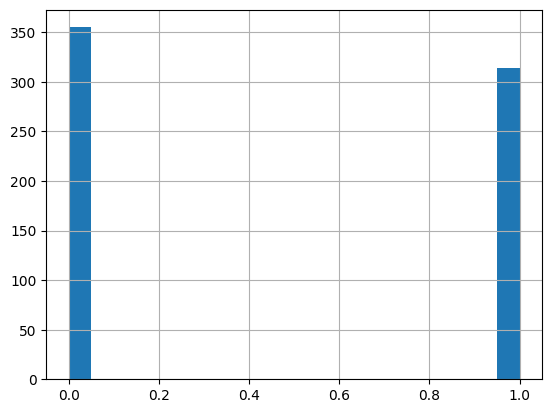

In [120]:
import numpy as np
import pandas as pd

overlap_scores = []

for user in ratings_subset.UserId.unique():
    try:
        recommended = model_lib.topN(user=user, n=100)

        user_rated = ratings_subset.loc[ratings_subset.UserId == user, 'ItemId']

        relevant_items = ratings_subset.loc[
            (ratings_subset.UserId == user) & (ratings_subset.Rating >= 3), 'ItemId'
        ]

        valid_rec = set(recommended).intersection(set(user_rated))
        score = len(set(recommended).intersection(set(relevant_items))) / len(valid_rec)
        overlap_scores.append(score)

    except:
        overlap_scores.append(0)

overlap_scores = np.array(overlap_scores)
print("Average overlap:", overlap_scores.mean())
pd.Series(overlap_scores).hist(bins=20)


avg_perc_overlap: 0.6022727272727273


<Axes: >

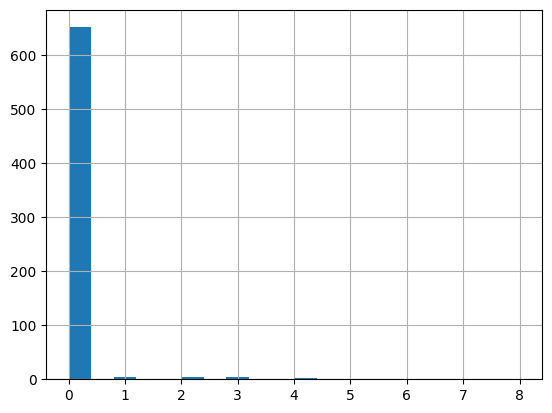

In [122]:
overlap= []
num_rec = []
n = 10
for user in ratings_subset.UserId.unique():
    top_items = model_lib.topN(user=user, n=n)
    user_movies = ratings_subset.loc[(ratings_subset.UserId==user)].ItemId
    valid_rec = set(top_items).intersection(set(user_movies)) # I can only measure by what was in the training data

    _ = len(set(ratings_subset.loc[ratings_subset.UserId==user].sort_values(by='Rating', ascending=False).head(n).ItemId).intersection(set(valid_rec)))
    overlap.append(_)
    num_rec.append(len(valid_rec))

print('avg_perc_overlap:', np.array(overlap).mean() / np.array(num_rec).mean())
pd.Series(overlap).hist(bins=20)